# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, i directly gathered **all** three pieces of data for this project and loaded them in the notebook. <br>
However, the methods required to gather each data were different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import json
import requests
import os
import numpy as np    
import re
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [8]:
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
if not os.path.exists('image_prediction.tsv'):
    os.makedirs('image_prediction.tsv')
    with open('image_predictions.tsv', 'wb') as file:
        file.write(response.content)

In [9]:
image_prediction = pd.read_csv('image_predictions.tsv', '\t')
image_prediction.head()
    

C:\Users\Teslim\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  exec(code_obj, self.user_global_ns, self.user_ns)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [10]:
# I manually gathered this data
dflist_ = []
with open('tweet-json.txt') as file:
    for tweet in file:
        info = json.loads(tweet)
        tweet_id = info.get('id_str')
        retweet_counts = info.get('retweet_count')
        favorite_counts = info.get('favorite_count')
        dflist_.append({'tweet_id': tweet_id,
                        'retweet_counts': retweet_counts,
                        'favorite_counts': favorite_counts})

In [11]:
retweet_fav_count = pd.DataFrame(dflist_, columns = ['tweet_id', 'retweet_counts', 'favorite_counts'])

In [12]:
retweet_fav_count.sample(25)

,tweet_id,retweet_counts,favorite_counts
2024,671879137494245376,748,1507
1795,677269281705472000,790,2164
141,864279568663928832,3266,15195
76,877736472329191424,17300,71144
884,759943073749200896,2382,6581
1442,696713835009417216,757,2613
1520,690649993829576704,325,1435
1623,684830982659280897,24514,38551
287,838476387338051585,5484,24664
1589,686606069955735556,607,2071


## Assessing Data
In this section, I detected and documented at least **eight (8) quality issues and two (2) tidiness issue**. Using **both** visual assessment
programmatic assessement to assess the data.

I paid rapt attention to the following key points when accessing the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



#### Assessing Twitter Archive Table


In [17]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- The following columns - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have null values. And this columns don't really contribute to the analysis process. Let's assess this columns to understand why they are NAN values. Using .info() and assessing each columns.
- Also it could be observed that there are rows in the text column that have retweets, which is not needed. 

In [13]:
twitter_archive[twitter_archive.in_reply_to_status_id.notnull()]
twitter_archive[twitter_archive.retweeted_status_timestamp.notnull()]
twitter_archive[twitter_archive.in_reply_to_user_id.notnull()]
twitter_archive[twitter_archive.retweeted_status_id.notnull()]
twitter_archive[twitter_archive.retweeted_status_user_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


- Through the info displayed above, it could be observed that the text columns are retweeted. i.e they have (RT @) symbol
- For the retweeted_status_timestamp column, we can't get back this values. Thus we don't need them that much since we have a complete timestamp column.
- The other columns above have incomplete values, and can't be addressed using imputting, so i'll rather take them off.

In [14]:
# Used the dtype function to check for data type.
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

Quality
- tweet_id has invalid datatype.
- timestamp column has invalid data type

In [15]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Quality
- expanded_urls column has missing values

In [16]:
twitter_archive.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

Quality
- The value for the source column is innacurrate.


In [17]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

Quality
- The values for rating_numerator column are inconsistent

In [18]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

Quality
- The values for the rating_denominator column are inconsistent.


In [19]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
272,840761248237133825,NaN,NaN,2017-03-12 03:07:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Maddie and Gunner....,8.406323e+17,4.196984e+09,2017-03-11 18:35:42 +0000,"https://www.gofundme.com/3hgsuu0,https://twitt...",12,10,Maddie,None,None,None,None
1001,747933425676525569,NaN,NaN,2016-06-28 23:23:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pls don't send more sherks. I don't care how s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747933425...,11,10,None,None,None,None,None
1110,733822306246479872,NaN,NaN,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,None,floofer,None,None
1889,674774481756377088,NaN,NaN,2015-12-10 02:15:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Superpup. His head isn't proportional ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674774481...,11,10,Superpup,None,None,pupper,None
989,748932637671223296,NaN,NaN,2016-07-01 17:33:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Divine Doggo. Must be magical af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748932637...,13,10,Divine,doggo,None,None,None
967,750381685133418496,7.501805e+17,4.717297e+09,2016-07-05 17:31:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 such a good doggo\n@spaghemily,NaN,NaN,NaN,NaN,13,10,None,doggo,None,None,None
853,765371061932261376,NaN,NaN,2016-08-16 02:14:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louie. He's had a long day. Did a lot ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765371061...,11,10,Louie,None,None,pupper,None
349,831650051525054464,NaN,NaN,2017-02-14 23:43:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I usually only share these on Friday's, but th...",NaN,NaN,NaN,"http://www.gofundme.com/bluethewhitehusky,http...",13,10,None,None,None,None,None
981,749417653287129088,NaN,NaN,2016-07-03 01:41:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Finn. He's the most unphotogenic puppe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749417653...,11,10,Finn,None,None,pupper,None
890,759566828574212096,NaN,NaN,2016-07-31 01:50:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This... is a Tyrannosaurus rex....,7.395441e+17,4.196984e+09,2016-06-05 19:47:03 +0000,https://twitter.com/dog_rates/status/739544079...,10,10,None,None,None,None,None


In [20]:
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

Quality
- Name column has invalid value (a) and None


In [21]:
# Assesing the structure of the dog stages variables
twitter_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


Tidiness

- The twitter_archive table has an issue of tidiness, where each observation should form a row - The dog type, doggo,floofer, pupper, puppo are variables and should form a column.

#### Assessing Image Prediction table.

###### Visual Assesment

In [30]:
image_prediction[image_prediction['p3_dog'] != True]
#image_prediction.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


*Quality*
- Inconsistent column names for p1, p2, p3, p_conf, p_dog columns
- p1, p2, p3 values are separated by hyphen character
- Values for p1,p2,p3_conf are in proportions instead of percentage.
- Columns that has all its p_dog values to be False should be eliminated
- The columns p1, p2, p3, p3_conf, p2_conf, p1_conf, should be streamlined to one column, depicting the correct name of the picture.


###### Programmatic Assesment

In [31]:
image_prediction.dtypes
image_prediction[image_prediction.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


*Quality*
- The column tweet_id is an integer  data type
- p1_conf, p2_conf, p3_conf are columns that should be change to percentage

*Tidiness*
- Columns with p names, should be streamlined to have one column.`

#### Assessing retweet_fav_count table

###### Visual Assessment

In [32]:
retweet_fav_count.tail()

,tweet_id,retweet_counts,favorite_counts
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


- Pretty good to go visually

###### Programmatic Assessment

In [25]:
retweet_fav_count.dtypes

tweet_id           object
retweet_counts      int64
favorite_counts     int64
dtype: object

- Pretty good to go

## Assessing Summary -
### Quality issues
* Twitter_archive table
1.  The following columns - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have null values that can't be accounted for, and the retweet_id column could stand for them.
  - However, there are some rows in the text column that have retweet, this rows have values in the above listed columns.

2. Expanded_urls has missing values
3. duplicates should be dropped
4. tweet_id has invalid datatype.  timestamp column have invalid data type
5. The column tweet_id is an integer  data type

6. The value for the source column is innacurrate

7. The values for the rating_denominator column are inconsistent.
8. The values for rating_numerator column are inconsistent


* Image_predictions Table


9. Inconsistent column names for p1, p2, p3, p_conf, p_dog columns

10. p1, p2, p3 values are separated by hyphen character
11. The columns p1, p2, p3, p3_conf, p2_conf, p1_conf, should be streamlined to one column, depicting the correct name of the picture.





### Tidiness issues
1. The twitter_archive table has an issue of tidiness, where each observation should form a row - The dog type, doggo,floofer, pupper, puppo are variables and should form a column.
2. The image_prediction table and twitter archive table should be in same column.




## Cleaning Data
In this section, I cleaned **all** of the issues I documented while assessing. 

However, I ensured that I made a copy of the original data before cleaning. 
Cleaning included merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). I ensured that the result of cleaning is a high-quality and tidy master pandas DataFrame.

In [33]:
# Make copies of original pieces of data
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
retweet_fav_count_clean = retweet_fav_count.copy()

### Missing Values:  Unwanted Columns to be eliminated

#### Define:
 - I will  remove retweeted rows in the text column, through the columns below with null values.
The following columns - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp have null values that can't be accounted for, and the retweet_id column could stand for them. 
<br> Therefore, we drop these columns. using the drop function.


#### Code

In [34]:
# Separating rows with retweet values from the text column
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]

In [35]:
# dropping columns that are not needed
twitter_archive_clean.drop(['in_reply_to_status_id' , 'in_reply_to_user_id', 'retweeted_status_id',
                            'retweeted_status_user_id', 'retweeted_status_timestamp'],
                           axis = 1, inplace = True)

In [36]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Missing values #2:  Expanded Url has missing values

#### Define
 I explored this link to see if the link is still in use, but it wasn't. Prolly its only function is that it helps us in extracting the tweet_id column, so i moved on to eliminating the column.

#### Code

In [37]:
twitter_archive_clean.drop(['expanded_urls'], axis=1, inplace = True)

#### Test

In [28]:
twitter_archive_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


### Tidiness:    Image_prediction table: Each observation should form a row.

#### Define:
The columns with p1, p2, p3, should be streamlined to one column same as the p_conf.
To do this, i'll use the apply function to select from the dataframe, and see if the selected value is True.  then we save the sorresponding prediction proportion.
<br> We create a new list that saves the inspected value after passing the if/else statement, then save this list in a series dataframe then append to the main dataframe.

#### Code

In [38]:
# Create a function and if-else statement to predict the statement.
plist = []
def image_predictor(df):
    if (df['p1_dog'] == True and df['p1_conf'] > df['p2_conf'] and df['p1_conf'] > df['p3_conf']):
        plist.append(df['p1'])
    elif (df['p2_dog']== True and df['p2_conf']> df['p1_conf'] and df['p2_conf']>df['p3_conf']):
        plist.append(df['p2'])
    elif (df['p3_dog']==True and df['p3_conf']>df['p1_conf'] and df['p3_conf']>df['p3_conf']):
        plist.append(df['p3'])
    else:
        plist.append(np.nan)
        
image_prediction_clean.apply(image_predictor, axis = 1)
image_prediction_clean['Dog_breed']= plist
image_prediction_clean.sample(40)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Dog_breed
751,688064179421470721,https://pbs.twimg.com/media/CYx-tGaUoAAEXV8.jpg,1,Eskimo_dog,0.240602,True,Norwegian_elkhound,0.180369,True,Siberian_husky,0.090739,True,Eskimo_dog
1620,802952499103731712,https://pbs.twimg.com/media/CySpCSHXcAAN-qC.jpg,1,chow,0.944032,True,golden_retriever,0.017240,True,Pomeranian,0.012085,True,chow
1152,732585889486888962,https://pbs.twimg.com/media/Ciqq-VFUUAANlWm.jpg,2,Staffordshire_bullterrier,0.843359,True,American_Staffordshire_terrier,0.028290,True,miniature_pinscher,0.016793,True,Staffordshire_bullterrier
758,688789766343622656,https://pbs.twimg.com/media/CY8SocAWsAARuyh.jpg,1,American_Staffordshire_terrier,0.599660,True,Staffordshire_bullterrier,0.380976,True,bull_mastiff,0.003889,True,American_Staffordshire_terrier
264,670797304698376195,https://pbs.twimg.com/media/CU8mlhoVAAAteS5.jpg,1,Pembroke,0.472197,True,beagle,0.090938,True,German_shepherd,0.064366,True,Pembroke
1587,798209839306514432,https://pbs.twimg.com/media/CxPPnCYWIAAo_ao.jpg,1,Pekinese,0.524583,True,Shih-Tzu,0.102931,True,Pomeranian,0.097893,True,Pekinese
1615,802247111496568832,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053364,True,Chihuahua
1753,824663926340194305,https://pbs.twimg.com/media/C3HLd0HXUAAUI2b.jpg,1,English_setter,0.526488,True,golden_retriever,0.402815,True,Irish_setter,0.034418,True,English_setter
1270,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False,NaN
946,704499785726889984,https://pbs.twimg.com/media/Ccbi0UGWoAA4fwg.jpg,1,Chihuahua,0.376541,True,Siamese_cat,0.098057,False,Labrador_retriever,0.085211,True,Chihuahua


In [39]:
# Drop unwanted columns - img_num, p1, p2, p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog, Dog_categoy
image_prediction_clean.drop(['img_num', 'p1', 'p2', 'p3', 'p1_conf', 'p2_conf',
                             'p3_conf', 'p1_dog', 'p2_dog', 'p3_dog'], axis =1, inplace = True)

In [40]:
# Eliminated rows that don't have dog breed
image_prediction_clean = image_prediction_clean.dropna()

#### Test

In [32]:
image_prediction_clean.head()

,tweet_id,jpg_url,Dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher


### Tidiness: Develop a column in which each varaible (Doggo, floffer, pupper, puppo) makes a column.

#### Define
Develop a column from the above variables, in which i will merge the columns to one variable. Some entries have 2 dog stages, thus, i will rather concatenate the columns

#### code

In [41]:
# To do this, i will first replace the None and Nan values with an empty string to allow me to efficiently concatenate the columns
dog_stage_list = ['doggo', 'floofer', 'pupper', 'puppo']
for i in dog_stage_list:
    twitter_archive_clean[i].replace('None', '', inplace=True)
    twitter_archive_clean[i].replace(np.NaN, '', inplace=True)
twitter_archive_clean['stage']  = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'
# remove old columns - doggo, floofer, puppo, pupper
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace = True)

#### Test

In [54]:
twitter_archive_clean.stage.value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

In [37]:
twitter_archive_clean.sample(40)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage
353,831309418084069378,2017-02-14 01:09:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Scooter and his son Montoya. Scooter ...,12,10,Scooter,
173,858471635011153920,2017-04-30 00:02:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She just arrived. Used paworit...,13,10,Sophie,
769,777189768882946048,2016-09-17 16:57:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeffrey. He's being held so he doesn't...,12,10,Jeffrey,
2090,670786190031921152,2015-11-29 02:07:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Creg. You offered him a ride to work b...,8,10,Creg,
405,823939628516474880,2017-01-24 17:04:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cash. He's officially given pup on tod...,12,10,Cash,
2055,671362598324076544,2015-11-30 16:18:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tanner. He accidentally dropped all hi...,11,10,Tanner,
1303,707420581654872064,2016-03-09 04:19:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Keurig. He's a rare dog. Laughs like a...,4,10,Keurig,
1637,684195085588783105,2016-01-05 02:09:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tino. He really likes corndogs. 9/10 h...,9,10,Tino,
1840,675888385639251968,2015-12-13 04:02:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Breathtaking scene. A father taking care of hi...,10,10,None,
1779,677716515794329600,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,120,None,


### Tidiness: Twitter_archive and image prediction table should be merged together.

#### Define
Both table have the some amount of similar tweet id. thus we can merge them together

#### Code

In [57]:
# Convert the tweet_id data type for the twitter_archive table to object to allow easy merging
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('object')
image_prediction_clean['tweet_id'] = image_prediction_clean.tweet_id.astype('object')

# Merge the dataset together
twitter_archive_image = pd.merge(image_prediction_clean, twitter_archive_clean, how = 'right', on = 'tweet_id')


C:\Users\Teslim\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:916: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  key_col = Index(lvals).where(~mask_left, rvals)


#### Test

In [58]:
# Check for null values
twitter_archive_image
twitter_archive_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   object
 1   jpg_url             1477 non-null   object
 2   Dog_breed           1477 non-null   object
 3   timestamp           2175 non-null   object
 4   source              2175 non-null   object
 5   text                2175 non-null   object
 6   rating_numerator    2175 non-null   int64 
 7   rating_denominator  2175 non-null   int64 
 8   name                2175 non-null   object
 9   stage               2175 non-null   object
dtypes: int64(2), object(8)
memory usage: 186.9+ KB


In [68]:
# The nan values in the dog breed and jpg url should be replaced with None
twitter_archive_image['jpg_url'] = twitter_archive_image['jpg_url'].replace(np.nan, 'None')
twitter_archive_image['Dog_breed'] = twitter_archive_image['Dog_breed'].replace(np.nan, 'None')

In [69]:
twitter_archive_image.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   jpg_url             2175 non-null   object             
 2   Dog_breed           2175 non-null   object             
 3   timestamp           2175 non-null   datetime64[ns, UTC]
 4   source              2175 non-null   object             
 5   text                2175 non-null   object             
 6   rating_numerator    2175 non-null   int64              
 7   rating_denominator  2175 non-null   int64              
 8   name                2175 non-null   object             
 9   stage               2175 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 251.5+ KB


- We now have 2 tables  - twitter_archive_image and retweet_fav_count_clean

### Quality: Duplicate values in the twitter_archive_image table

#### Define
Drop duplicated values in the new twitter_archive_image tabel using the drop duplicates

#### Code

In [70]:
twitter_archive_image.drop_duplicates(inplace = True)

#### Test

In [71]:
twitter_archive_image

,tweet_id,jpg_url,Dog_breed,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,None,None,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343424.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,None,None,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,
...,...,...,...,...,...,...,...,...,...,...
2170,666049248165822464.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,
2171,666044226329800704.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,
2172,666033412701032448.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,a,
2173,666029285002620928.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,a,


In [72]:
twitter_archive_image.Dog_breed.value_counts()

None                  698
golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
                     ... 
Scotch_terrier          1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
clumber                 1
Name: Dog_breed, Length: 112, dtype: int64

### Quality:  Invalid datatype

In [73]:
#twitter_archive_image.timestamp('datetime')
twitter_archive_image['timestamp'] = pd.to_datetime(twitter_archive_image['timestamp'])
twitter_archive_image.dtypes

tweet_id                           object
jpg_url                            object
Dog_breed                          object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
rating_numerator                    int64
rating_denominator                  int64
name                               object
stage                              object
dtype: object

### Quality: Innacurate value for source column

#### Define
The source column has invalid value, therefore i will clean to have the normal string/object value.

#### Code

In [74]:
twitter_archive_image.source[0]

'Twitter for iPhone'

In [76]:
# Using the lambda function to separate the twitter source column, by applying the regular expression to the column.
twitter_archive_image['source'] = twitter_archive_image['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [77]:
twitter_archive_image.head()

,tweet_id,jpg_url,Dog_breed,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,None,None,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343424.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,None,None,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,


### Quality: Fixing Text column 

#### Define

- *Lets eliminate the url, the new line, and we also change the html ampersand code from "&amp ;" to "&" in the text column.*
- We utilized regular expression at some point. 
- The reason why we have to clean this table is because it contains more information about the rating numerator/denominator columns. 


#### Code

In [78]:
twitter_archive_image['text'] = twitter_archive_image.text.str.replace('\n', ' ')
twitter_archive_image['text'] = twitter_archive_image.text.str.replace(r'http\S+', '')
twitter_archive_image['text'] = twitter_archive_image.text.str.replace('&amp;', '&')
twitter_archive_image['text'] = twitter_archive_image.text.str.strip()

C:\Users\Teslim\AppData\Local\Temp\ipykernel_11276\886290858.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_image['text'] = twitter_archive_image.text.str.replace(r'http\S+', '')


#### Test

In [79]:
twitter_archive_image.text[0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10"

### Quality: Inconsistent values for rating denominator and rating numerator

#### Define
The rating_numerator column has  inconsistent values, that needs to be cleaned.

#### Code

In [80]:
# Here we use imputing strattegy to correct incorrect values, since we can't get them appropriately and they wont affect the
#solution that much.
twitter_archive_image.rating_numerator[twitter_archive_image.rating_numerator >  15] = 10


C:\Users\Teslim\AppData\Local\Temp\ipykernel_11276\2170378411.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_image.rating_numerator[twitter_archive_image.rating_numerator >  15] = 10


#### Test

In [81]:
twitter_archive_image.rating_numerator.value_counts()

12    500
10    467
11    426
13    307
9     156
8      98
7      54
14     43
5      36
6      32
3      19
4      17
2       9
1       8
0       2
15      1
Name: rating_numerator, dtype: int64

#### Define
The rating_denomintaor column has values that are invalid

####  Code

In [82]:
# Reset the index for the rating_denominator column
twitter_archive_image = twitter_archive_image.reset_index()
# drop the default index column created by the jupyter program.
twitter_archive_image.drop('index', axis = 1, inplace = True)
# Fixed issues of invalid values of the rating_denominator
twitter_archive_image.rating_denominator[twitter_archive_image.rating_denominator != 10] = 10


C:\Users\Teslim\AppData\Local\Temp\ipykernel_11276\214790546.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_archive_image.rating_denominator[twitter_archive_image.rating_denominator != 10] = 10


#### Test

In [83]:
twitter_archive_image[twitter_archive_image.rating_denominator != 10]

,tweet_id,jpg_url,Dog_breed,timestamp,source,text,rating_numerator,rating_denominator,name,stage


### Dog breed values are separated by columns

#### Define

#### Code

In [84]:
twitter_archive_image.Dog_breed = twitter_archive_image.Dog_breed.str.replace('_', ' ')


#### Test

In [85]:
twitter_archive_image

,tweet_id,jpg_url,Dog_breed,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,None,None,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,
1,892177421306343424.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,
2,891815181378084864.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,
3,891689557279858688,None,None,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,
4,891327558926688256.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,
...,...,...,...,...,...,...,...,...,...,...
2170,666049248165822464.0,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature pinscher,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,
2171,666044226329800704.0,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian ridgeback,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,
2172,666033412701032448.0,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German shepherd,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,9,10,a,
2173,666029285002620928.0,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,7,10,a,


## Storing Data
In this section, I saved the gathered, assessed, and cleaned twitter_archive_image, retweet_fav_count dataset to a CSV file named "twitter_archive_master.csv", "retweet_count.csv" respectively.

In [86]:
twitter_archive_image.to_csv('twitter_archive_master.csv', index = False)
retweet_fav_count_clean.to_csv('retweet_count.csv', index = False)

## Analyzing and Visualizing Data
In this section, I analyzed and visualized my wrangled data. In which i developed  **three (3) insights and one (1) visualization.**

In [87]:
twitter_image_data = pd.read_csv('twitter_archive_master.csv')
twitter_image_data.head()

,tweet_id,jpg_url,Dog_breed,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,8.924206e+17,None,None,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,8.921774e+17,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,8.918152e+17,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,8.916896e+17,None,None,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,8.913276e+17,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


### Insights:
1. Characteristics of Dogs with high rating

2. What source was utilized the most

3. Most Popular dog breed


In [88]:
twitter_image_data.head()

,tweet_id,jpg_url,Dog_breed,timestamp,source,text,rating_numerator,rating_denominator,name,stage
0,8.924206e+17,None,None,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN
1,8.921774e+17,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN
2,8.918152e+17,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN
3,8.916896e+17,None,None,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN
4,8.913276e+17,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN


In [91]:
xteristics_12 = twitter_image_data[twitter_image_data.rating_numerator >12 ]

In [92]:
xteristics_12.stage.value_counts()

doggo            29
pupper           25
puppo            11
floofer           3
doggo, puppo      1
doggo, pupper     1
Name: stage, dtype: int64

- There are more doggo type of dog in the dogs with high rating.

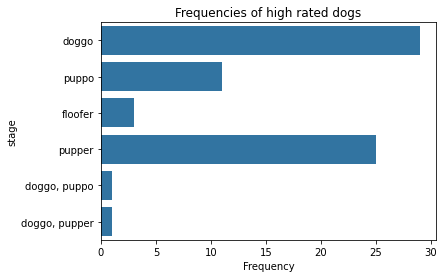

In [93]:
base_color = sns.color_palette()[0]
sns.countplot(data = xteristics_12,y = 'stage', color = base_color)
plt.xlabel('Frequency')
plt.title('Frequencies of high rated dogs')
plt.savefig('Frequencies of high rated dogs')

#### Most popular dog breed

In [94]:
twitter_image_data.Dog_breed.value_counts()

None                  698
golden retriever      139
Labrador retriever     95
Pembroke               88
Chihuahua              79
                     ... 
Scotch terrier          1
EntleBucher             1
Japanese spaniel        1
standard schnauzer      1
clumber                 1
Name: Dog_breed, Length: 112, dtype: int64

Most popular dog breed is the 'Golden Retriever'

#### What source was used most?

In [95]:
 twitter_image_data.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

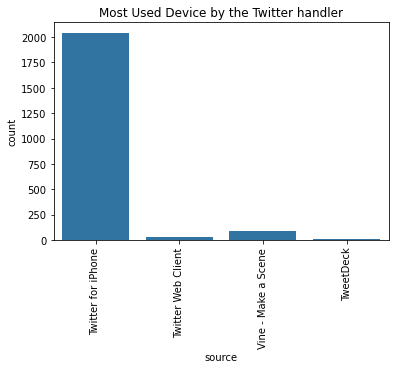

In [97]:
base_color = sns.color_palette()[0]
sns.countplot(data = twitter_image_data, x = 'source', color = base_color)
plt.title('Most Used Device by the Twitter handler')
plt.xticks(rotation = 90)
plt.savefig('source', bbox_inches='tight')

- Most of these tweets came from the source - Twitter for Iphone

### Visualizations

#### Relationship between retweet and likes

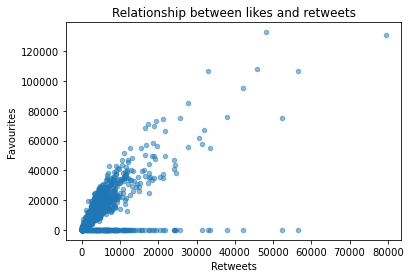

In [98]:
#Retweets against Favorites


retweet_fav_count_clean.plot(kind='scatter',x='retweet_counts',y='favorite_counts', alpha = 0.5, colormap= 'YlOrRd')
plt.xlabel('Retweets')
plt.ylabel('Favourites')
plt.title('Relationship between likes and retweets')

plt.savefig('Likes_and_Retweets_relationship.png', bbox_inches='tight')

- Retweets are posiively correlated with favorites